In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
#importing the data on schizophrenia from the cross study 
#"Identification of risk loci with shared effects on five major psychiatric disorders: a genome-wide analysis."
#this study looks at five diseases, but I'm just using schizophrenia as an example, we can 
#compare the diseases later and also incorporate data from other papers if we like
df=pd.read_csv('/home/nbuser/library/schizophrenia.csv')
df.head()


,snpid,hg18chr,bp,refallele,altallele,oddsratio,stand_error,pval,info,ngt,CEUaf
0,rs3131972,1,742584,A,G,1.0000,0.0966,0.9991,0.702,0,0.16055
1,rs3131969,1,744045,A,G,1.0000,0.0925,0.9974,0.938,0,0.133028
2,rs3131967,1,744197,T,C,1.0010,0.0991,0.9928,0.866,0,.
3,rs1048488,1,750775,T,C,0.9999,0.0966,0.9991,0.702,0,0.836449
4,rs12562034,1,758311,A,G,1.0250,0.0843,0.7716,0.988,0,0.0925926


In [4]:
df.iloc[:, 0:8]
df.head()
#this dropped the columns with data that are not particularly useful to us 

,snpid,hg18chr,bp,refallele,altallele,oddsratio,stand_error,pval,info,ngt,CEUaf
0,rs3131972,1,742584,A,G,1.0000,0.0966,0.9991,0.702,0,0.16055
1,rs3131969,1,744045,A,G,1.0000,0.0925,0.9974,0.938,0,0.133028
2,rs3131967,1,744197,T,C,1.0010,0.0991,0.9928,0.866,0,.
3,rs1048488,1,750775,T,C,0.9999,0.0966,0.9991,0.702,0,0.836449
4,rs12562034,1,758311,A,G,1.0250,0.0843,0.7716,0.988,0,0.0925926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf017ce438>]], dtype=object)

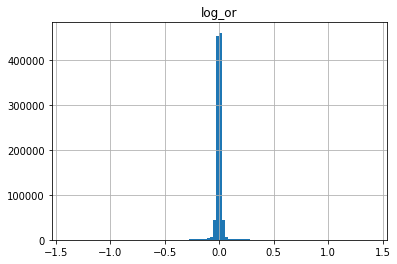

In [5]:
df['log_or'] = np.log10(df['oddsratio'])
df.hist('log_or',bins=100)
#this displayes the odds ratio in a nice histogram 
#https://youtu.be/09ZaCKfdwzM for info on what the odds ratio shows
#basically we care about values that are not close to 1 (log of 1 is zero, like on histogram)

In [6]:
data ={}
for i in range(1,17):
    data[i]=df[:][df['hg18chr']==i]
#now we can select data by what chromosome the snp is on, otherwise there is too much data and we end up with crowded plots
#we can use other characteristics as well 

In [7]:
data[1]
#this is just the data from snps on the first chromosome

,snpid,hg18chr,bp,refallele,altallele,oddsratio,stand_error,pval,info,ngt,CEUaf,log_or
0,rs3131972,1,742584,A,G,1.0000,0.0966,0.999100,0.702,0,0.16055,0.000000
1,rs3131969,1,744045,A,G,1.0000,0.0925,0.997400,0.938,0,0.133028,0.000000
2,rs3131967,1,744197,T,C,1.0010,0.0991,0.992800,0.866,0,.,0.000434
3,rs1048488,1,750775,T,C,0.9999,0.0966,0.999100,0.702,0,0.836449,-0.000043
4,rs12562034,1,758311,A,G,1.0250,0.0843,0.771600,0.988,0,0.0925926,0.010724
5,rs4040617,1,769185,A,G,0.9993,0.0920,0.994000,0.979,0,0.87156,-0.000304
6,rs4970383,1,828418,A,C,1.0960,0.1664,0.580600,0.439,0,0.201835,0.039811
7,rs4475691,1,836671,T,C,1.0590,0.1181,0.625700,1.020,0,0.146789,0.024896
8,rs1806509,1,843817,A,C,0.9462,0.1539,0.719300,0.383,0,0.600917,-0.024017
9,rs7537756,1,844113,A,G,0.9004,0.1004,0.296200,0.251,0,0.834862,-0.045565


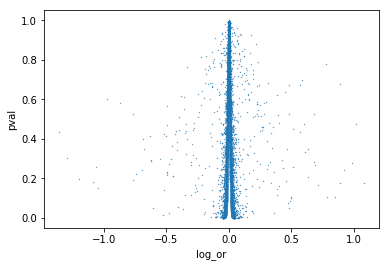

In [8]:
data[16].plot.scatter(y='pval',x='log_or',s=0.1)
#this uses data from the 16th chomosome as an example
#plotting the log of odds ratio vs p value
#we are able to see that most snps are not significant (p<0.05) and have no association with schizophrenia

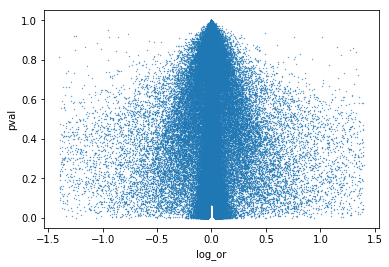

In [9]:
df.plot.scatter(y='pval',x='log_or',s=0.1)
#this is the data for all chromosomes, seems we could do some PCA or clustering?

In [10]:
df_extreme=df[(abs(df['log_or'])>1.2) & (df['pval']<0.1)]
df_extreme.head()
#df_extreme is snps that are more significant and associated with disease
#these are the snps we would want to examine 

,snpid,hg18chr,bp,refallele,altallele,oddsratio,stand_error,pval,info,ngt,CEUaf,log_or
27681,rs12563308,1,62842299,T,C,18.96000,1.225,0.01628,0.996,0,0.99541284,1.277838
45035,rs12737764,1,101134771,T,C,0.04814,1.479,0.04024,0.252,0,.,-1.317494
64095,rs4987370,1,167929149,T,C,0.04283,1.782,0.07711,0.244,0,.,-1.368252
75853,rs10158300,1,195831860,A,G,18.88000,1.181,0.01283,0.301,0,0.99541284,1.276002
76094,rs9628686,1,196426716,T,G,0.05489,1.759,0.09886,0.302,0,.,-1.260507


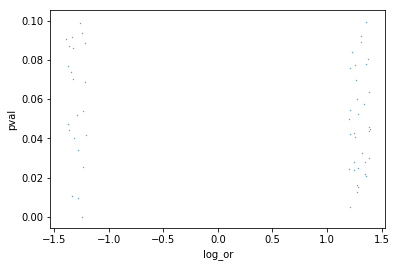

In [11]:
df_extreme.plot.scatter(y='pval',x='log_or',s=0.1)

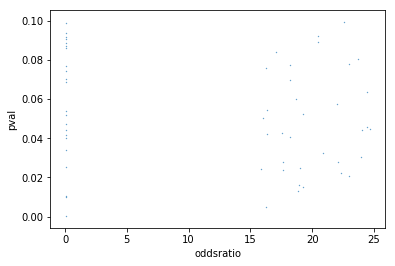

In [12]:
df_extreme.plot.scatter(y='pval',x='oddsratio',s=0.1)